<h1 style="color:red "> Evaluable 2 </h1>
<span style="color:blue"> Alejandro Hernández De la Torre </span>

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import sqlite3
import numpy as np


import seaborn as sns; sns.set_theme()
df = pd.read_csv("covid19_tweets.csv")
print (df)

ModuleNotFoundError: No module named 'wordcloud'

In [4]:
df.describe()

,user_followers,user_friends,user_favourites
count,7.443600e+04,74436.000000,7.443600e+04
mean,1.059513e+05,2154.721170,1.529747e+04
std,8.222900e+05,9365.587474,4.668971e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.660000e+02,153.000000,2.200000e+02
50%,9.600000e+02,552.000000,1.927000e+03
75%,5.148000e+03,1780.250000,1.014800e+04
max,1.389284e+07,497363.000000,2.047197e+06


## Interpretación Describe
Los siguientes datos nos marcan las estadisticas de las personas que tweetearon acerca del COVID-19. En periodos de tiempo consisos. Decidimos enfocarnos en los seguidores, usuarios y favoritos. Por ejemplo con la función "describe" nos dimos cuenta de varias cosas interesantes, por ejemplo con la función count nos dimos cuenta que los user_followers es casí igual a los user_favorites. Es decir que ambas cifras son parecidas en cantidad. Por lo que se podría decir que los usuarios ganan followers si otros le da un "favorite" o estan de acuerdo con lo que piensan o dicen. Pero cuando observamos la estandarización podemos ver que los followers se desvian muy fuerte en comparación de los favoritos, haciendo que un fenomeno de fluctuación suceda en comparación al punto anterior,esta fluctuación tambien la podemos ver en los cuartiles los cuales estan indicados con numeros y porcentajes. Lo interesante se puede ver en la maxima y minima. Ya que hay usuarios que no tienen seguidores, ni amigos ni favoritos. Por lo cual podriamos decir que hubo bots envueltos en esta toma de datos, pero en la maxima vemos numeros muy grandes lo cual tambien puede significar que alguna celebridad tmabien fue parte de este rastreo.

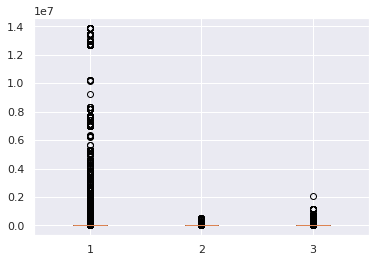

In [5]:
plt.boxplot(df[["user_followers","user_friends","user_favourites"]])

plt.show()

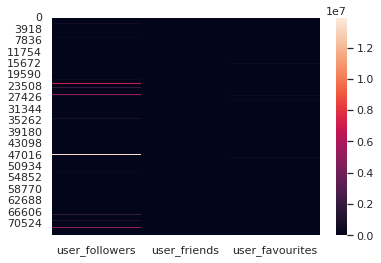

In [6]:
ax = sns.heatmap(df[["user_followers","user_friends","user_favourites"]])

## Interpretación Bigote y Heatmap
En estos mapas podemos ver que tan cesgados estan los datos y como estan las medias de los datos. En estas graficas no se alcanza a ver los numeros ni las relaciones correctamente, por lo cual podemos decir que los datos simplemente son muy diferentes los unos a los otros, tanto que ningún heatmap o caja de bigote en los incisos de "user_followers","user_friends","user_favourites"; puede encontrar una relación especifica con los datos y sus medias tambien por eso en la función describe pudimos ver cesgos gigantes comparando "mean" con los cuartiles.


In [7]:
df[["user_followers","user_friends","user_favourites","user_verified"]].corr(method ='kendall')

,user_followers,user_friends,user_favourites,user_verified
user_followers,1.000000,0.410663,0.242534,0.415364
user_friends,0.410663,1.000000,0.439099,-0.003114
user_favourites,0.242534,0.439099,1.000000,-0.032220
user_verified,0.415364,-0.003114,-0.032220,1.000000


## Interpretación Correlación
En estos datos podemos ver que tanto tienen que ver unos datos con otros, por eso en las columnas y filas que tienen nombre similar se puede ver un 1, ya que son la misma por lo tanto tienen que ver mucho una con otra por que son la misma. Pero lo interesante ocurre en los demas rubros por ejemplo en user_followers, se puede ver que tiene un .41 con los amigos, podiamos intuir que un poco menos de la mitad de los followers tienden a ser amigos de los usuarios y la mitad de esos son favoritos, pero menos de la mitad de los usuarios tienden a seguir a cuentas verificadas. Tambien podemos ver que las cuentas verificadas tienen muy poco amigos verificados, lo cual es logico, ya que no existen tantas cuentas verificadas.


## Texto

In [8]:
df.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

In [9]:
df[['user_location','text','date']].describe(include=np.object).transpose()

/tmp/ipykernel_8890/1685065004.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df[['user_location','text','date']].describe(include=np.object).transpose()


,count,unique,top,freq
user_location,59218,14622,India,1496
text,74436,74312,Greenland has no active cases of the novel cor...,6
date,74436,56546,2020-07-29 16:30:00,26


In [10]:
co_df_std = df.groupby('user_location').agg({'user_followers' : 'std'}).sort_values('user_followers',ascending = False)
co_df_mn = df.groupby('user_location').agg({'user_followers' : 'mean'}).sort_values('user_followers',ascending = False)
co_df_mdn = df.groupby('user_location').agg({'user_followers' : 'median'}).sort_values('user_followers',ascending = False)

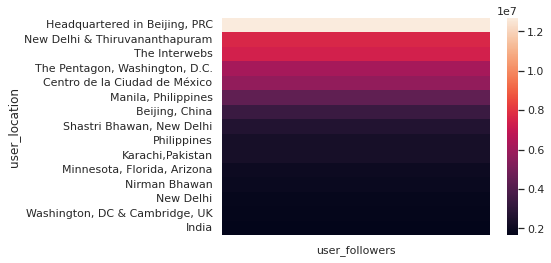

In [21]:
ax = sns.heatmap(co_df_mn.head(15))

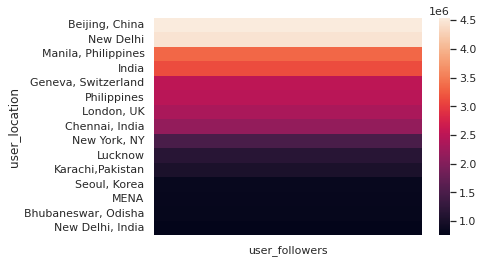

In [22]:
bx = sns.heatmap(co_df_std.head(15))

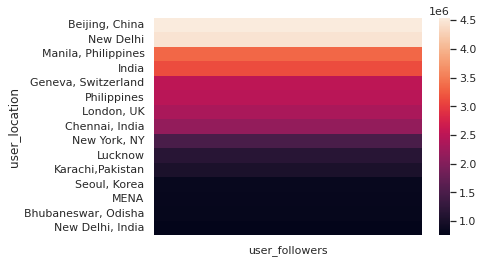

In [23]:
cx = sns.heatmap(co_df_std.head(15))

In [16]:
wo_df = df[df['user_location']=='México']
wo_df[['hashtags']]

,hashtags
23655,"['coronavirus', 'covid19']"
27245,NaN
47704,['DiplomaciaCulturalMX']
60884,NaN


In [34]:
wo_df = df[df['user_location']=='México']
wo_df_xd = wo_df.sort_values('date',ascending = False)
wo_df_xd

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
60884,melonfraufrau art & design,México,"Graphic designer, digital artist, painter. Cra...",2018-06-19 02:09:34,287,1647,9323,False,2020-08-02 20:43:24,The Mexican government in Puerto Morelos hired...,NaN,Twitter for iPad,False
47704,Diplomacia Cultural MX,México,Difusión de la cultura de México en el mundo,2020-05-18 23:49:30,1087,192,1458,False,2020-07-31 18:21:00,#DiplomaciaCulturalMX \n\nConcrete actions lik...,['DiplomaciaCulturalMX'],TweetDeck,False
27245,Mau Alvarado,México,"Dow, PA Manager & LA Global Citizenship Lead (...",2009-08-29 00:19:22,562,1093,1413,False,2020-07-27 05:34:13,"And the message seems: 'Hey, it’s ok to do thi...",NaN,Twitter for iPhone,False
23655,Nicolás Roitman,México,International Affairs 🌎\n\nSapere aude,2009-06-26 04:19:55,174,486,2813,False,2020-07-26 03:08:05,Must watch! #coronavirus #covid19\nhttps://t.c...,"['coronavirus', 'covid19']",Twitter for Android,False
